# Лабораторна робота №1 - Гібридні Нейронні Мережі MLP / RBN

## Підготовка середовища

1. Імпорти залежностей

In [1]:
import torch
import random
import numpy as np

import torch.utils.data as data_utils

from src.model.hybrid import HybridMplRbn
from src.model.rbn import RbnModel
from src.visualization.plot import plot_loss_and_val_loss, plot_f1_score
from src.model.mlp import MlpModel
from src.util.torch_device import resolve_torch_device
from src.trainer.bp_trainer import Trainer

from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_digits
from sklearn.discriminant_analysis import StandardScaler

2. Встановити сід генератора випадкових чисел

In [2]:
random_seed = 42

random.seed(random_seed)
torch.manual_seed(random_seed)
np.random.seed(random_seed)

3. Завантажити девайс

In [3]:
device = resolve_torch_device()

4. Завантажити датасет

In [4]:
iris_ds = load_iris(return_X_y=True, as_frame=False)
mnist_ds = load_digits(return_X_y=True, as_frame=False)

5. Стандартизувати датасет

In [5]:
iris_scaler = StandardScaler()

iris_ds_x, iris_ds_y = iris_ds

iris_num_features = iris_ds_x.shape[1]
iris_num_classes = len(np.unique(iris_ds_y))

iris_ds_x = iris_scaler.fit_transform(iris_ds_x)
iris_ds = data_utils.TensorDataset(
    torch.from_numpy(iris_ds_x.astype(np.float32)),
    torch.from_numpy(iris_ds_y.astype(np.float32)),
)

In [6]:
mnist_scaler = StandardScaler()

mnist_ds_x, mnist_ds_y = mnist_ds

mnist_num_features = mnist_ds_x.shape[1]
mnist_num_classes = len(np.unique(mnist_ds_y))

mnist_ds_x = iris_scaler.fit_transform(mnist_ds_x)
mnist_ds = data_utils.TensorDataset(
    torch.from_numpy(mnist_ds_x.astype(np.float32)),
    torch.from_numpy(mnist_ds_y.astype(np.float32)),
)

6. Розділити обраний набір даних на три вибірки: тренувальну, валідаційну та тестову

In [7]:
batch_size = 512

iris_train_ds, iris_test_ds = train_test_split(
    iris_ds, train_size=0.9, random_state=random_seed
)
iris_train_ds, iris_valid_ds = train_test_split(
    iris_train_ds, train_size=0.9, random_state=random_seed
)

iris_train_loader = DataLoader(iris_train_ds, batch_size=batch_size)
iris_valid_loader = DataLoader(iris_valid_ds, batch_size=batch_size)
iris_test_loader = DataLoader(iris_test_ds, batch_size=batch_size)

print("Iris train dataset size: " + str(len(iris_train_ds)))
print("Iris validation dataset size: " + str(len(iris_valid_ds)))
print("Iris test dataset size: " + str(len(iris_test_ds)))

Iris train dataset size: 121
Iris validation dataset size: 14
Iris test dataset size: 15


In [8]:
batch_size = 256

mnist_train_ds, mnist_test_ds = train_test_split(
    mnist_ds, train_size=0.9, random_state=random_seed
)
mnist_train_ds, mnist_valid_ds = train_test_split(
    mnist_train_ds, train_size=0.9, random_state=random_seed
)

mnist_train_loader = DataLoader(mnist_train_ds, batch_size=batch_size)
mnist_valid_loader = DataLoader(mnist_valid_ds, batch_size=batch_size)
mnist_test_loader = DataLoader(mnist_test_ds, batch_size=batch_size)

print("MNIST train dataset size: " + str(len(mnist_train_ds)))
print("MNIST validation dataset size: " + str(len(mnist_valid_ds)))
print("MNIST test dataset size: " + str(len(mnist_test_ds)))

MNIST train dataset size: 1455
MNIST validation dataset size: 162
MNIST test dataset size: 180


## Навчання багатошарового персептрона на Iris датасеті (функція активації RELU).

1. Завантажити та налаштувати нейронну мережу обраної архітектури

In [9]:
iris_mlp_relu_model = MlpModel(
    activation="relu",
    input_size=iris_num_features,
    hidden_layer_size=32,
    output_size=iris_num_classes,
).to(device)

loss_fun = CrossEntropyLoss()
optimizer = Adam(iris_mlp_relu_model.parameters(), lr=1e-3)

trainer = Trainer(
    num_epochs=300,
    train_loader=iris_train_loader,
    eval_loader=iris_valid_loader,
    model=iris_mlp_relu_model,
    loss_fun=loss_fun,
    optimizer=optimizer,
    device=device,
)

2. Провести навчання нейронної мережі

In [10]:
train_feedback = trainer.train(disable_epoch_progress=True)

Overall progress:   0%|          | 0/300 [00:00<?, ?it/s]

In [11]:
metrics = trainer.evaluate_with(iris_test_loader)

print("Accuracy of the model on test ds: %s %%" % metrics.accuracy)
print("Loss of the model on test ds: %s %%" % metrics.loss)
print("F1 score of the model on test ds: %s %%" % metrics.f1)

Accuracy of the model on test ds: 1.0 %
Loss of the model on test ds: 0.17863279581069946 %
F1 score of the model on test ds: 1.0 %


3. Побудувати графіки точності та loss мережі під час навчання

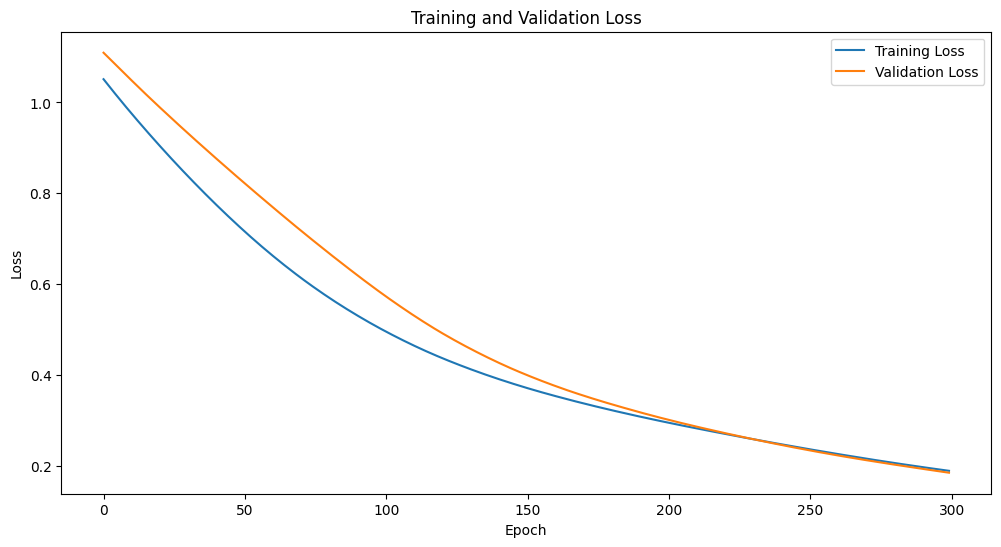

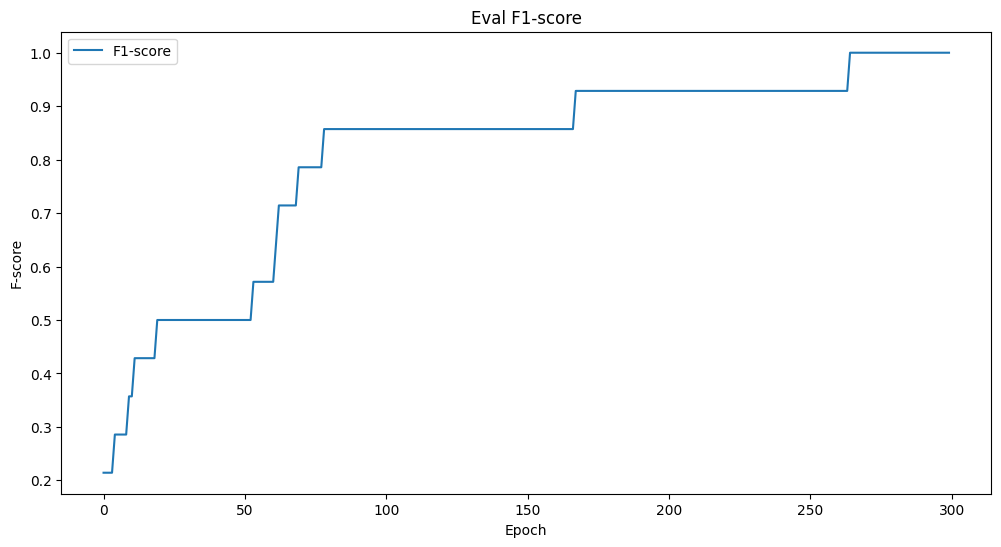

In [12]:
plot_loss_and_val_loss(train_feedback)
plot_f1_score(train_feedback)

## Навчання багатошарового персептрона на Iris датасеті (функція активації Identity).

1. Завантажити та налаштувати нейронну мережу обраної архітектури

In [13]:
iris_mlp_identity_model = MlpModel(
    activation="identity",
    input_size=iris_num_features,
    hidden_layer_size=32,
    output_size=iris_num_classes,
).to(device)

loss_fun = CrossEntropyLoss()
optimizer = Adam(iris_mlp_identity_model.parameters(), lr=1e-3)

trainer = Trainer(
    num_epochs=300,
    train_loader=iris_train_loader,
    eval_loader=iris_valid_loader,
    model=iris_mlp_identity_model,
    loss_fun=loss_fun,
    optimizer=optimizer,
    device=device,
)

2. Провести навчання нейронної мережі

In [14]:
train_feedback = trainer.train(disable_epoch_progress=True)

Overall progress:   0%|          | 0/300 [00:00<?, ?it/s]

In [15]:
metrics = trainer.evaluate_with(iris_test_loader)

print("Accuracy of the model on test ds: %s %%" % metrics.accuracy)
print("Loss of the model on test ds: %s %%" % metrics.loss)
print("F1 score of the model on test ds: %s %%" % metrics.f1)

Accuracy of the model on test ds: 1.0 %
Loss of the model on test ds: 0.2082400918006897 %
F1 score of the model on test ds: 1.0 %


3. Побудувати графіки точності та loss мережі під час навчання

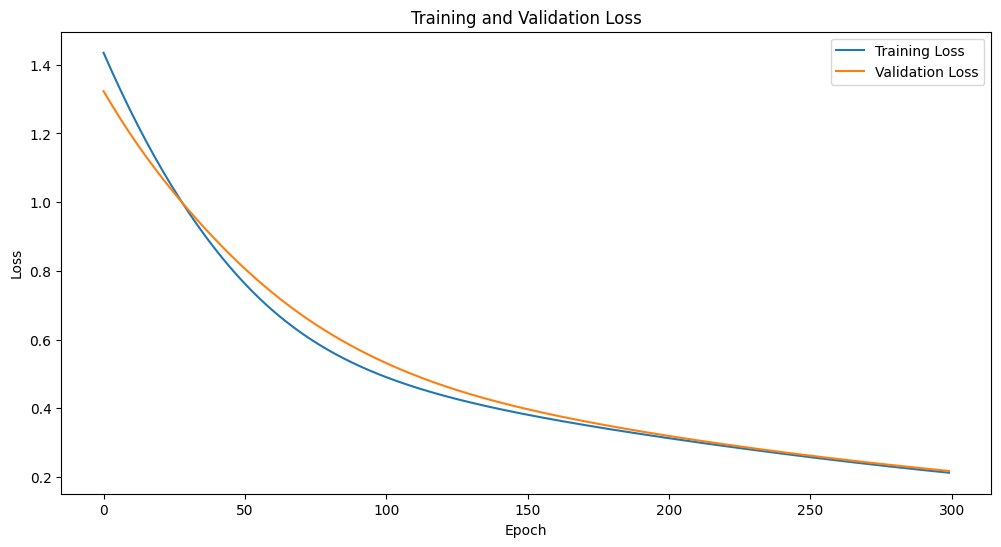

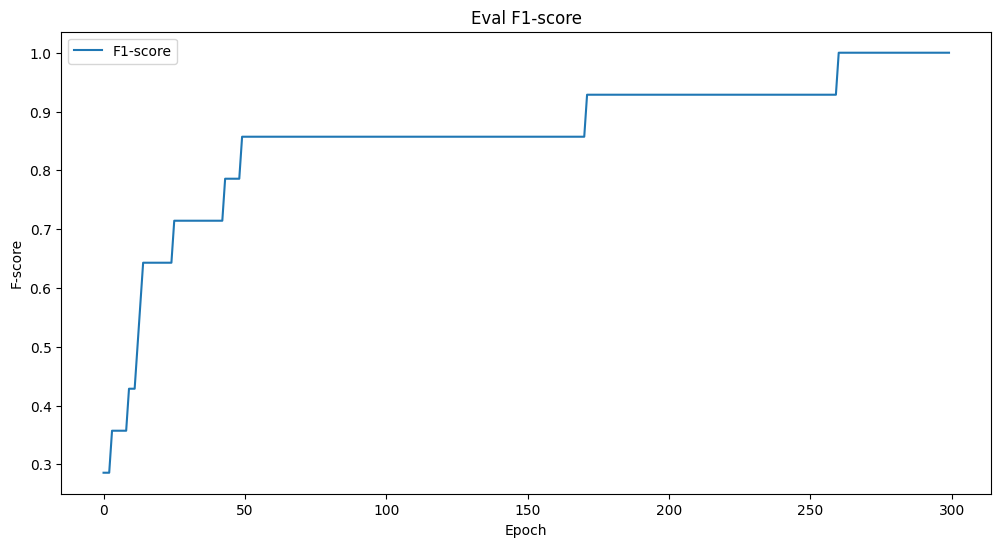

In [16]:
plot_loss_and_val_loss(train_feedback)
plot_f1_score(train_feedback)

## Навчання радиально базисної мережі на Iris датасеті (функція активації gaussian).

1. Завантажити та налаштувати нейронну мережу обраної архітектури

In [17]:
iris_rbn_gaussian_model = RbnModel(
    activation="gaussian",
    input_size=iris_num_features,
    num_kernels=8,
    output_size=iris_num_classes,
).to(device)

loss_fun = CrossEntropyLoss()
optimizer = Adam(iris_rbn_gaussian_model.parameters(), lr=1e-3)

trainer = Trainer(
    num_epochs=300,
    train_loader=iris_train_loader,
    eval_loader=iris_valid_loader,
    model=iris_rbn_gaussian_model,
    loss_fun=loss_fun,
    optimizer=optimizer,
    device=device,
)

2. Провести навчання нейронної мережі

In [18]:
train_feedback = trainer.train(disable_epoch_progress=True)

Overall progress:   0%|          | 0/300 [00:00<?, ?it/s]

In [19]:
metrics = trainer.evaluate_with(iris_test_loader)

print("Accuracy of the model on test ds: %s %%" % metrics.accuracy)
print("Loss of the model on test ds: %s %%" % metrics.loss)
print("F1 score of the model on test ds: %s %%" % metrics.f1)

Accuracy of the model on test ds: 1.0 %
Loss of the model on test ds: 0.6853811740875244 %
F1 score of the model on test ds: 1.0 %


3. Побудувати графіки точності та loss мережі під час навчання

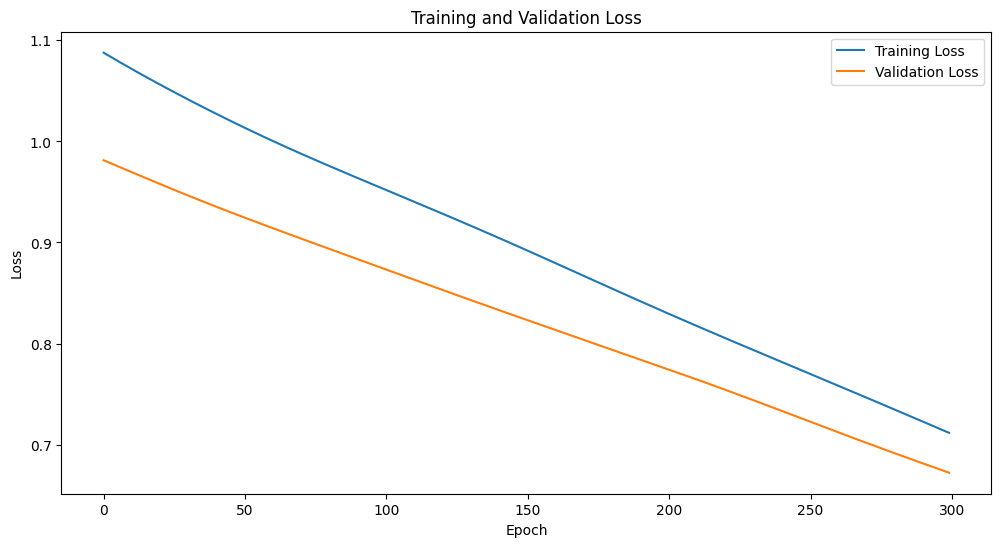

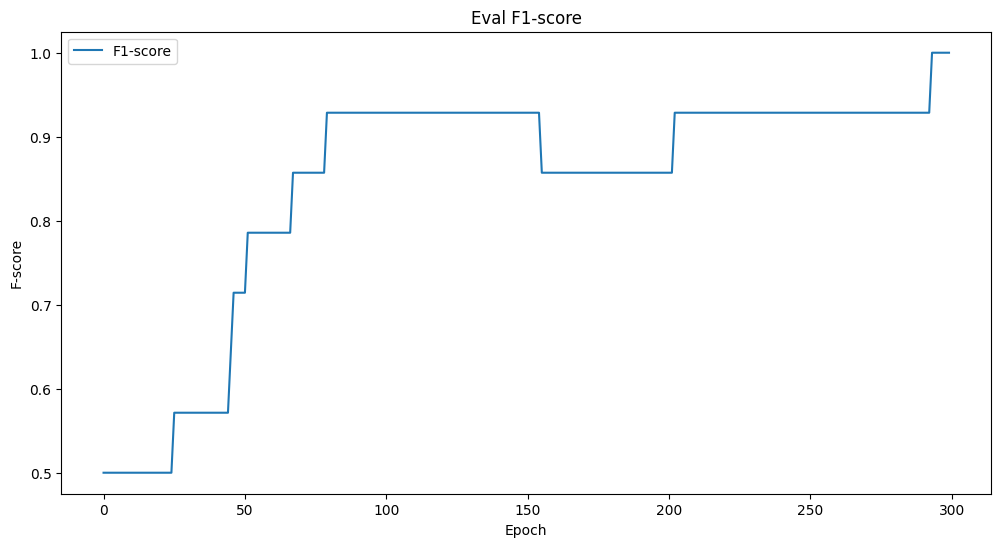

In [20]:
plot_loss_and_val_loss(train_feedback)
plot_f1_score(train_feedback)

## Навчання радиально базисної мережі на Iris датасеті (функція активації linear).

1. Завантажити та налаштувати нейронну мережу обраної архітектури

In [21]:
iris_rbn_linear_model = RbnModel(
    activation="linear",
    input_size=iris_num_features,
    num_kernels=8,
    output_size=iris_num_classes,
).to(device)

loss_fun = CrossEntropyLoss()
optimizer = Adam(iris_rbn_linear_model.parameters(), lr=1e-3)

trainer = Trainer(
    num_epochs=300,
    train_loader=iris_train_loader,
    eval_loader=iris_valid_loader,
    model=iris_rbn_linear_model,
    loss_fun=loss_fun,
    optimizer=optimizer,
    device=device,
)

2. Провести навчання нейронної мережі

In [22]:
train_feedback = trainer.train(disable_epoch_progress=True)

Overall progress:   0%|          | 0/300 [00:00<?, ?it/s]

In [23]:
metrics = trainer.evaluate_with(iris_test_loader)

print("Accuracy of the model on test ds: %s %%" % metrics.accuracy)
print("Loss of the model on test ds: %s %%" % metrics.loss)
print("F1 score of the model on test ds: %s %%" % metrics.f1)

Accuracy of the model on test ds: 0.7333333492279053 %
Loss of the model on test ds: 0.9250215888023376 %
F1 score of the model on test ds: 0.7333333492279053 %


3. Побудувати графіки точності та loss мережі під час навчання

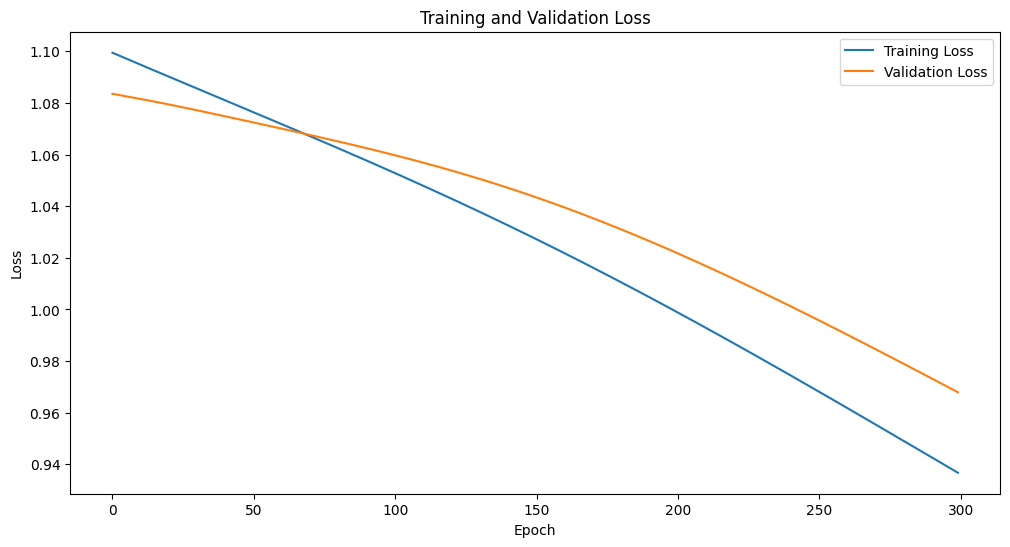

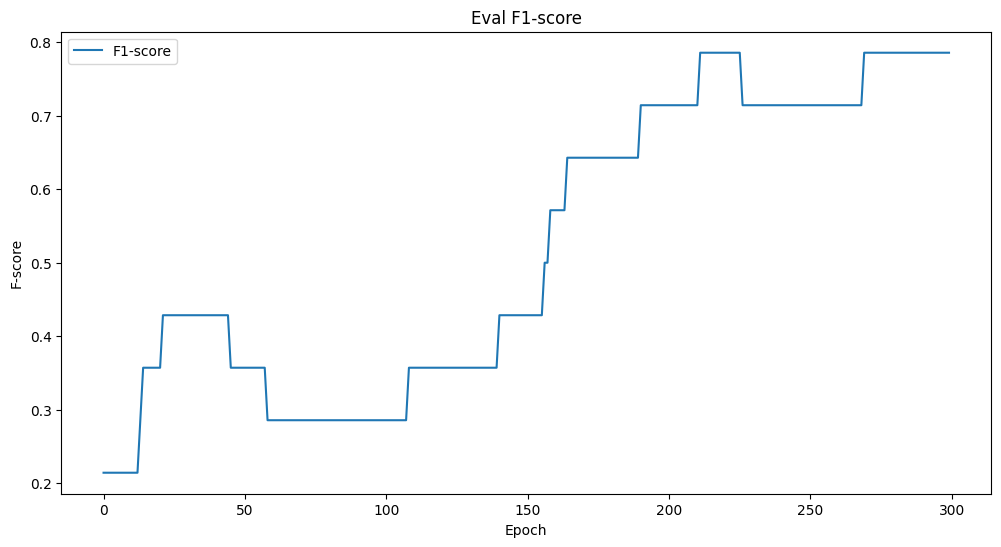

In [24]:
plot_loss_and_val_loss(train_feedback)
plot_f1_score(train_feedback)

## Навчання гібридної мережі на Iris датасеті

1. Завантажити та налаштувати нейронну мережу обраної архітектури

In [25]:
iris_hybrid_model = HybridMplRbn(iris_mlp_relu_model, iris_rbn_gaussian_model).to(device)

loss_fun = CrossEntropyLoss()
optimizer = Adam(iris_hybrid_model.parameters(), lr=1e-3)

trainer = Trainer(
    num_epochs=300,
    train_loader=iris_train_loader,
    eval_loader=iris_valid_loader,
    model=iris_hybrid_model,
    loss_fun=loss_fun,
    optimizer=optimizer,
    device=device,
)

2. Провести навчання нейронної мережі

In [26]:
train_feedback = trainer.train(disable_epoch_progress=True)

Overall progress:   0%|          | 0/300 [00:00<?, ?it/s]

In [27]:
metrics = trainer.evaluate_with(iris_test_loader)

print("Accuracy of the model on test ds: %s %%" % metrics.accuracy)
print("Loss of the model on test ds: %s %%" % metrics.loss)
print("F1 score of the model on test ds: %s %%" % metrics.f1)

Accuracy of the model on test ds: 1.0 %
Loss of the model on test ds: 0.36387667059898376 %
F1 score of the model on test ds: 1.0 %


3. Побудувати графіки точності та loss мережі під час навчання. Зробити висновки, оформити звіт;

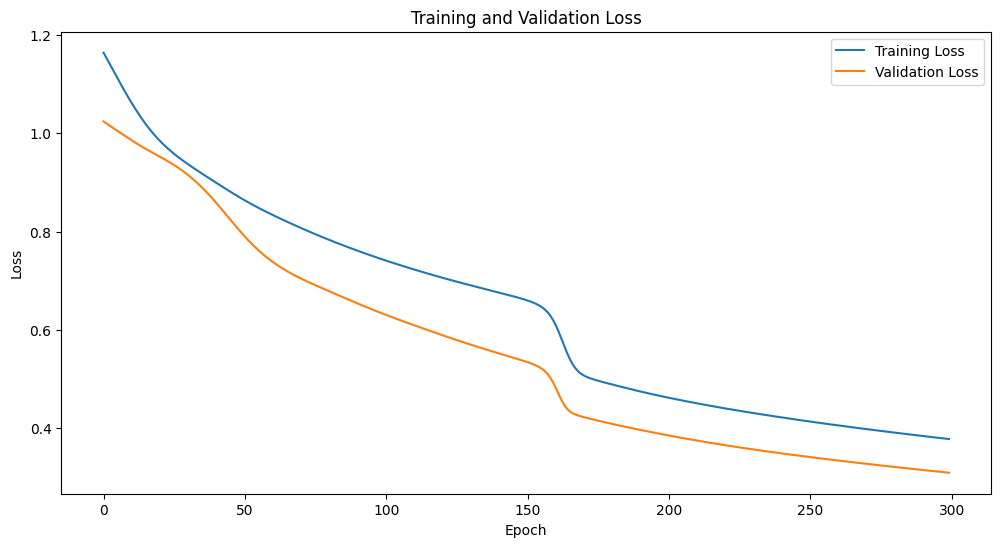

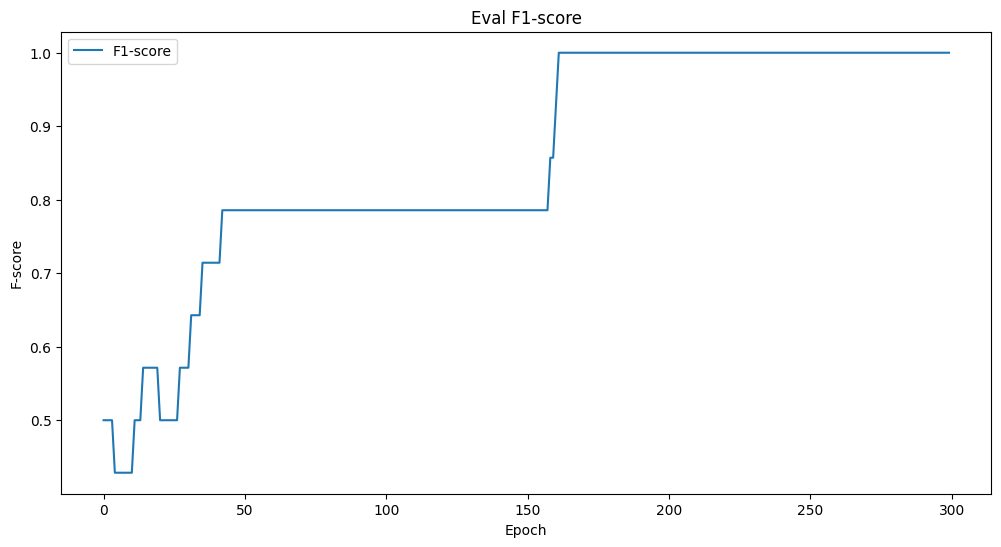

In [28]:
plot_loss_and_val_loss(train_feedback)
plot_f1_score(train_feedback)

## Навчання багатошарового персептрона на MNIST датасеті (функція активації RELU).

1. Завантажити та налаштувати нейронну мережу обраної архітектури

In [29]:
mnist_mlp_relu_model = MlpModel(
    activation="relu",
    input_size=mnist_num_features,
    hidden_layer_size=32,
    output_size=mnist_num_classes,
).to(device)

loss_fun = CrossEntropyLoss()
optimizer = Adam(mnist_mlp_relu_model.parameters(), lr=1e-3)

trainer = Trainer(
    num_epochs=300,
    train_loader=mnist_train_loader,
    eval_loader=mnist_valid_loader,
    model=mnist_mlp_relu_model,
    loss_fun=loss_fun,
    optimizer=optimizer,
    device=device,
)

2. Провести навчання нейронної мережі

In [30]:
train_feedback = trainer.train(disable_epoch_progress=True)

Overall progress:   0%|          | 0/300 [00:00<?, ?it/s]

In [31]:
metrics = trainer.evaluate_with(mnist_test_loader)

print("Accuracy of the model on test ds: %s %%" % metrics.accuracy)
print("Loss of the model on test ds: %s %%" % metrics.loss)
print("F1 score of the model on test ds: %s %%" % metrics.f1)

Accuracy of the model on test ds: 0.9833333492279053 %
Loss of the model on test ds: 0.07821311056613922 %
F1 score of the model on test ds: 0.9833333492279053 %


3. Побудувати графіки точності та loss мережі під час навчання

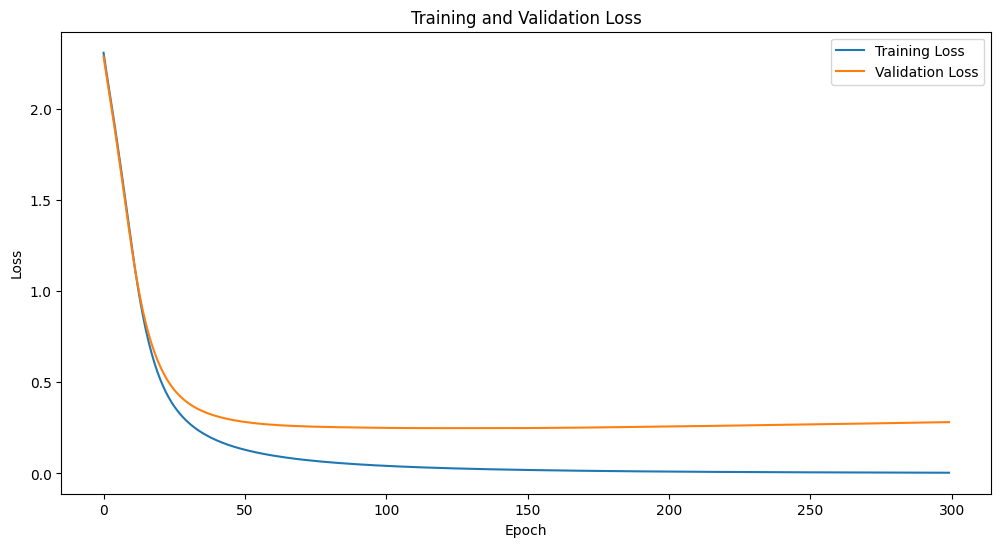

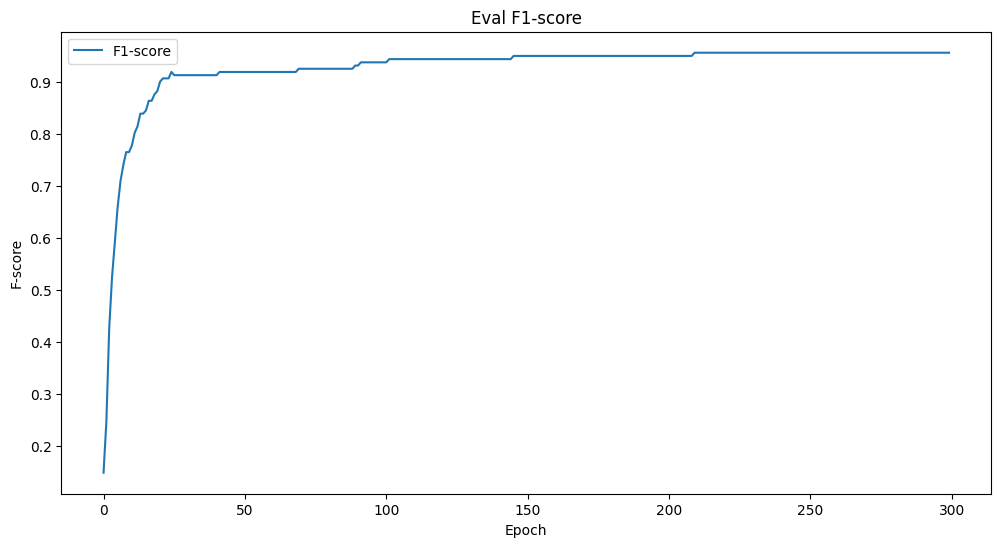

In [32]:
plot_loss_and_val_loss(train_feedback)
plot_f1_score(train_feedback)

## Навчання радиально базисної мережі на MNIST датасеті (функція активації identity).

1. Завантажити та налаштувати нейронну мережу обраної архітектури

In [33]:
mnist_mlp_identity_model = MlpModel(
    activation="identity",
    input_size=mnist_num_features,
    hidden_layer_size=32,
    output_size=mnist_num_classes,
).to(device)

loss_fun = CrossEntropyLoss()
optimizer = Adam(mnist_mlp_identity_model.parameters(), lr=1e-3)

trainer = Trainer(
    num_epochs=300,
    train_loader=mnist_train_loader,
    eval_loader=mnist_valid_loader,
    model=mnist_mlp_identity_model,
    loss_fun=loss_fun,
    optimizer=optimizer,
    device=device,
)

2. Провести навчання нейронної мережі

In [34]:
train_feedback = trainer.train(disable_epoch_progress=True)

Overall progress:   0%|          | 0/300 [00:00<?, ?it/s]

In [35]:
metrics = trainer.evaluate_with(mnist_test_loader)

print("Accuracy of the model on test ds: %s %%" % metrics.accuracy)
print("Loss of the model on test ds: %s %%" % metrics.loss)
print("F1 score of the model on test ds: %s %%" % metrics.f1)

Accuracy of the model on test ds: 0.9611111283302307 %
Loss of the model on test ds: 0.1263485550880432 %
F1 score of the model on test ds: 0.9611111283302307 %


3. Побудувати графіки точності та loss мережі під час навчання

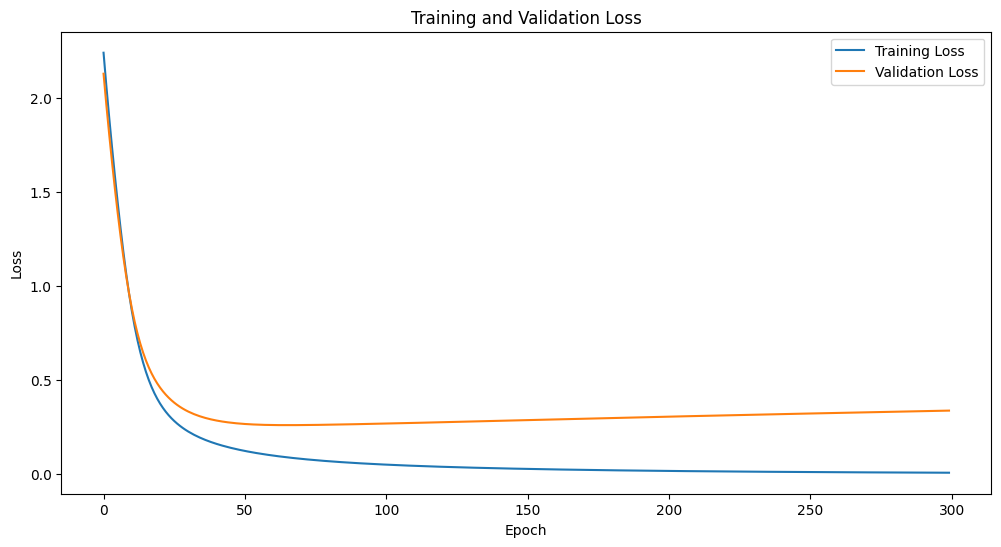

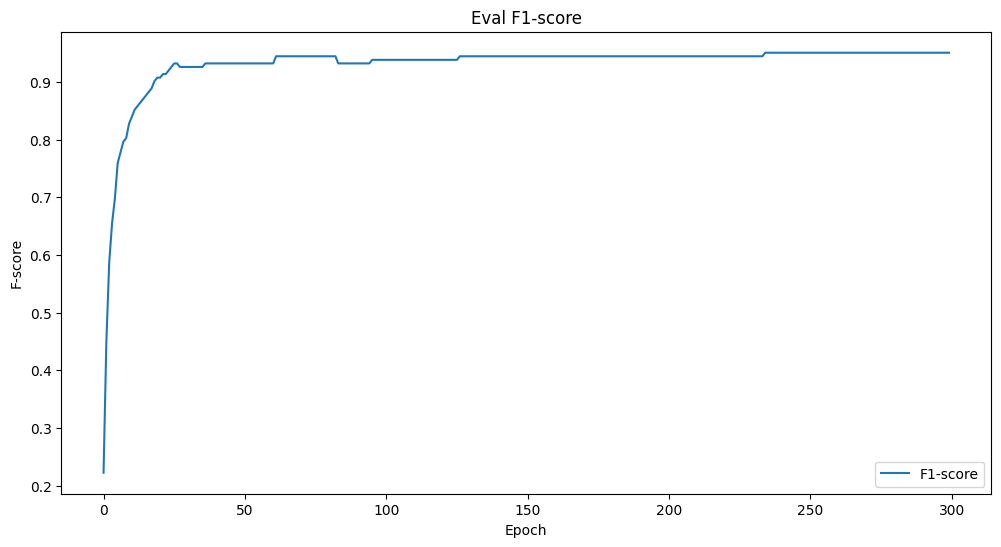

In [36]:
plot_loss_and_val_loss(train_feedback)
plot_f1_score(train_feedback)

## Навчання радиально базисної мережі на MNIST датасеті (функція активації gaussian).

1. Завантажити та налаштувати нейронну мережу обраної архітектури

In [37]:
mnist_rbn_gaussian_model = RbnModel(
    activation="gaussian",
    input_size=mnist_num_features,
    num_kernels=8,
    output_size=mnist_num_classes,
).to(device)

loss_fun = CrossEntropyLoss()
optimizer = Adam(mnist_rbn_gaussian_model.parameters(), lr=1e-3)

trainer = Trainer(
    num_epochs=300,
    train_loader=mnist_train_loader,
    eval_loader=mnist_valid_loader,
    model=mnist_rbn_gaussian_model,
    loss_fun=loss_fun,
    optimizer=optimizer,
    device=device,
)

2. Провести навчання нейронної мережі

In [38]:
train_feedback = trainer.train(disable_epoch_progress=True)

Overall progress:   0%|          | 0/300 [00:00<?, ?it/s]

In [39]:
metrics = trainer.evaluate_with(mnist_test_loader)

print("Accuracy of the model on test ds: %s %%" % metrics.accuracy)
print("Loss of the model on test ds: %s %%" % metrics.loss)
print("F1 score of the model on test ds: %s %%" % metrics.f1)

Accuracy of the model on test ds: 0.18333333730697632 %
Loss of the model on test ds: 1.7963939905166626 %
F1 score of the model on test ds: 0.18333333730697632 %


3. Побудувати графіки точності та loss мережі під час навчання

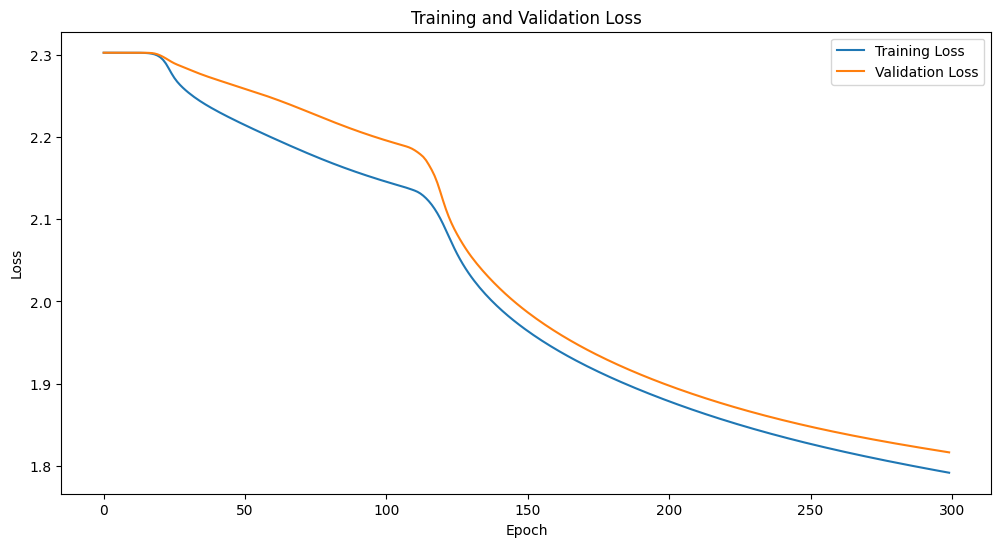

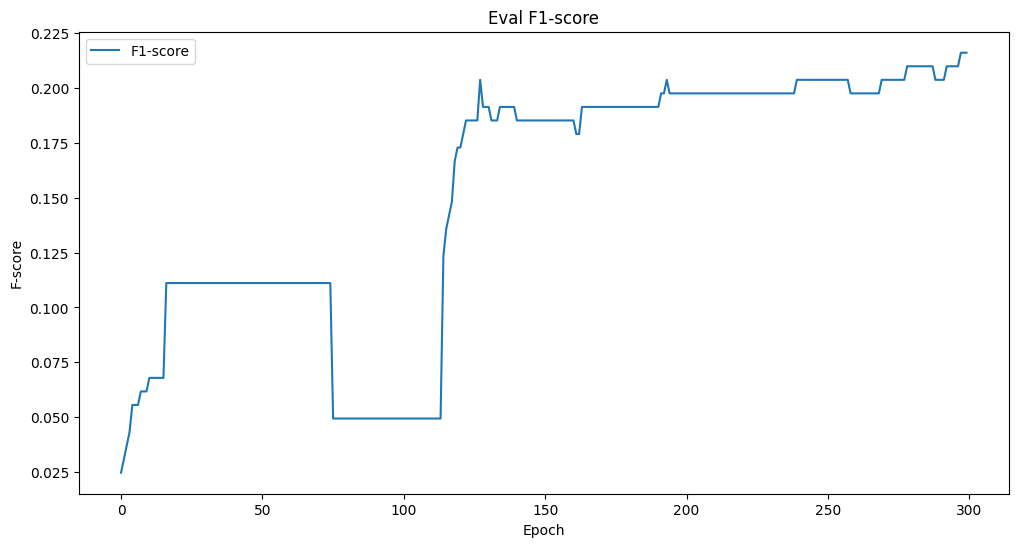

In [40]:
plot_loss_and_val_loss(train_feedback)
plot_f1_score(train_feedback)

## Навчання радиально базисної мережі на MNIST датасеті (функція активації linear).

1. Завантажити та налаштувати нейронну мережу обраної архітектури

In [41]:
mnist_rbn_linear_model = RbnModel(
    activation="linear",
    input_size=mnist_num_features,
    num_kernels=8,
    output_size=mnist_num_classes,
).to(device)

loss_fun = CrossEntropyLoss()
optimizer = Adam(mnist_rbn_linear_model.parameters(), lr=1e-3)

trainer = Trainer(
    num_epochs=300,
    train_loader=mnist_train_loader,
    eval_loader=mnist_valid_loader,
    model=mnist_rbn_linear_model,
    loss_fun=loss_fun,
    optimizer=optimizer,
    device=device,
)

2. Провести навчання нейронної мережі

In [42]:
train_feedback = trainer.train(disable_epoch_progress=True)

Overall progress:   0%|          | 0/300 [00:00<?, ?it/s]

In [43]:
metrics = trainer.evaluate_with(mnist_test_loader)

print("Accuracy of the model on test ds: %s %%" % metrics.accuracy)
print("Loss of the model on test ds: %s %%" % metrics.loss)
print("F1 score of the model on test ds: %s %%" % metrics.f1)

Accuracy of the model on test ds: 0.4000000059604645 %
Loss of the model on test ds: 2.1221985816955566 %
F1 score of the model on test ds: 0.40000003576278687 %


3. Побудувати графіки точності та loss мережі під час навчання

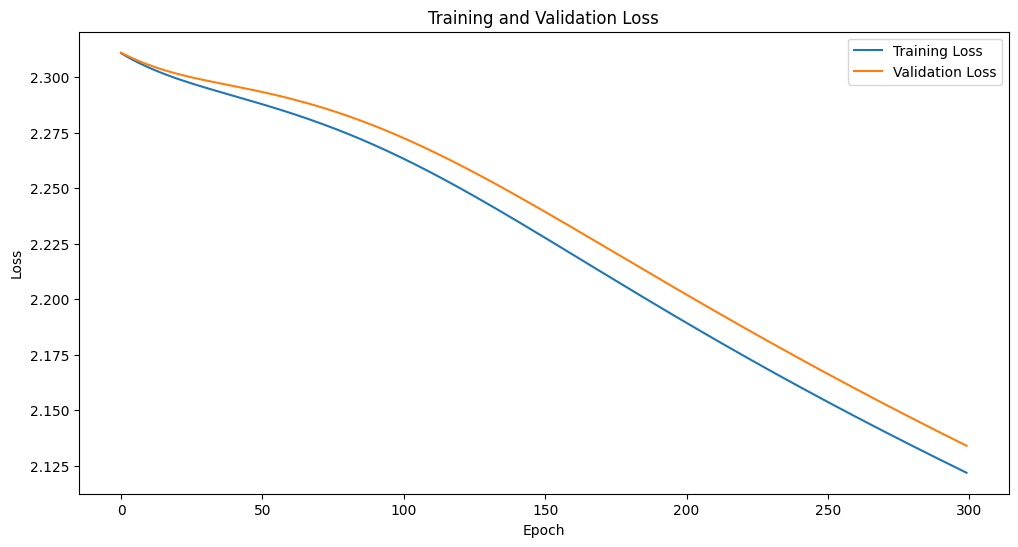

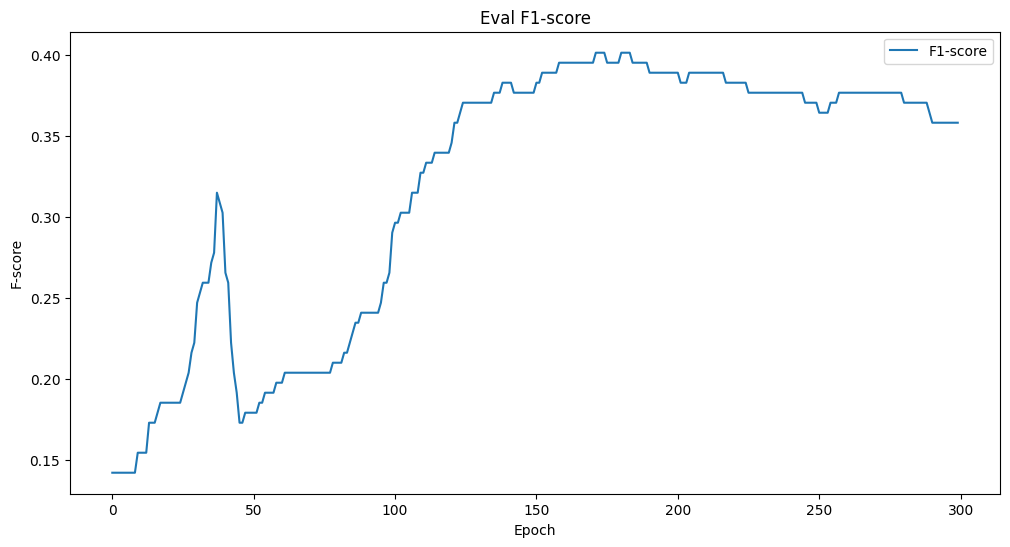

In [44]:
plot_loss_and_val_loss(train_feedback)
plot_f1_score(train_feedback)

## Навчання гібридної мережі на MNIST датасеті

1. Завантажити та налаштувати нейронну мережу обраної архітектури

In [45]:
mnist_hybrid_model = HybridMplRbn(mnist_mlp_relu_model, mnist_rbn_gaussian_model).to(
    device
)

loss_fun = CrossEntropyLoss()
optimizer = Adam(mnist_hybrid_model.parameters(), lr=1e-3)

trainer = Trainer(
    num_epochs=300,
    train_loader=mnist_train_loader,
    eval_loader=mnist_valid_loader,
    model=mnist_hybrid_model,
    loss_fun=loss_fun,
    optimizer=optimizer,
    device=device,
)

2. Провести навчання нейронної мережі

In [46]:
train_feedback = trainer.train(disable_epoch_progress=True)

Overall progress:   0%|          | 0/300 [00:00<?, ?it/s]

In [47]:
metrics = trainer.evaluate_with(mnist_test_loader)

print("Accuracy of the model on test ds: %s %%" % metrics.accuracy)
print("Loss of the model on test ds: %s %%" % metrics.loss)
print("F1 score of the model on test ds: %s %%" % metrics.f1)

Accuracy of the model on test ds: 0.2611111104488373 %
Loss of the model on test ds: 1.6090497970581055 %
F1 score of the model on test ds: 0.2611111104488373 %


3. Побудувати графіки точності та loss мережі під час навчання

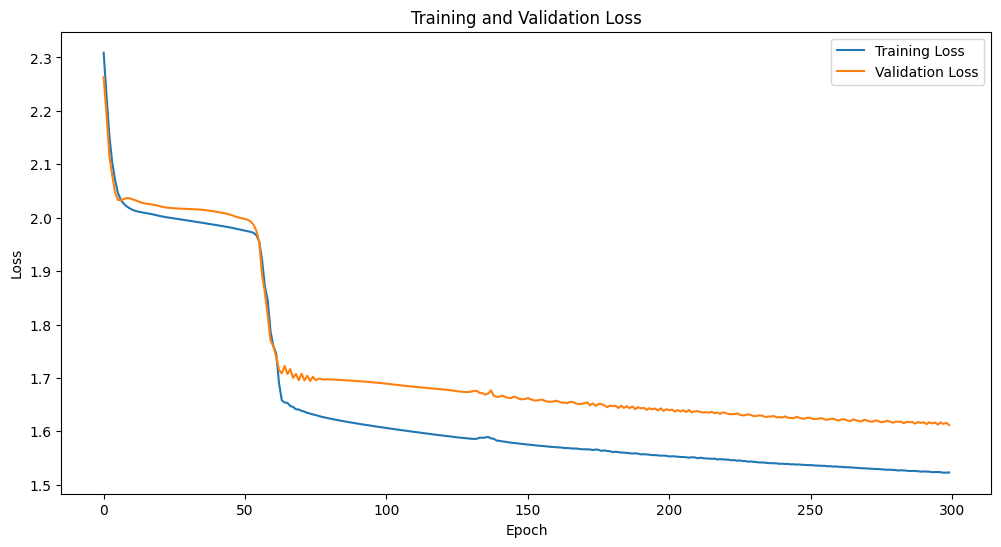

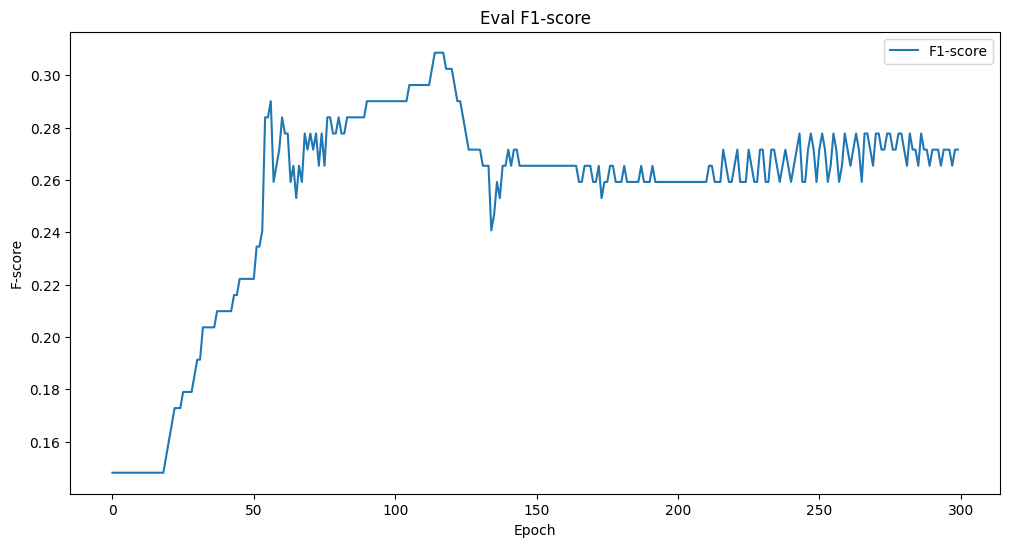

In [48]:
plot_loss_and_val_loss(train_feedback)
plot_f1_score(train_feedback)